In [1]:
# pip install numba --upgrade
# pip install pygraphviz
import sys
sys.path.insert(0, "/home/ubuntu/aiclass/1731036003_HANJINKIM/")

import tensorflux.graph as tfg
import tensorflux.deep_learning_networks as tfn
import tensorflux.enums as tfe
import datasource.mnist as mnist
import tensorflux.functions as tff
import math
import numba
import numpy as np
import matplotlib.pyplot as plt
print(numba.__version__)
%matplotlib inline

0.33.0


In [2]:
input_size = 784
hidden_layer1_size = 128
hidden_layer2_size = 128
output_size = 10
model_params_dir = "/home/ubuntu/temp"

x = tfg.Placeholder(name="x")
target = tfg.Placeholder(name="target")

n_sgd = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.SGD.value,
    learning_rate=0.01,
    model_params_dir=model_params_dir
)

n_momentum = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Momentum.value,
    learning_rate=0.01,
    model_params_dir=model_params_dir
)

n_nag = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.NAG.value,
    learning_rate=0.01,
    model_params_dir=model_params_dir
)

n_adagrad = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.AdaGrad.value,
    learning_rate=0.01,
    model_params_dir=model_params_dir
)

n_adam = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Adam.value,
    learning_rate=0.01,
    model_params_dir=model_params_dir
)

Multi Layer Network Model - ID: C3QZY2M2
Multi Layer Network Model - ID: S1I0616S
Multi Layer Network Model - ID: 3ZQGA0QF
Multi Layer Network Model - ID: 58L6USSS
Multi Layer Network Model - ID: WY2JDM3K


In [3]:
data = mnist.MNIST_Data()
#data = mnist.Fashion_MNIST_Data()

In [4]:
batch_size = 1000
max_epoch = 100

neural_networks = {"SGD": n_sgd, "Momentum": n_momentum, "Nesterov": n_nag, "AdaGrad": n_adagrad, "Adam": n_adam}
#neural_networks = {"AdaGrad": n_adagrad, "Adam": n_adam}

for key, neural_network in neural_networks.items():
    print("***" + key + "***")
    neural_network.learning(
        max_epoch=max_epoch, 
        data=data, 
        batch_size=batch_size, 
        print_period=1, 
        is_numba=False, 
        verbose=False
    )

***SGD***
-- Learning Started --
Epoch   0 Completed - Train Error: 2.331171 - Validation Error: 2.323385 - Test Accuracy: 0.101600
Epoch   1 Completed - Train Error: 0.385990 - Validation Error: 0.384759 - Test Accuracy: 0.886000
Epoch   2 Completed - Train Error: 0.292491 - Validation Error: 0.266162 - Test Accuracy: 0.917900
Epoch   3 Completed - Train Error: 0.229411 - Validation Error: 0.214879 - Test Accuracy: 0.934300
Epoch   4 Completed - Train Error: 0.165275 - Validation Error: 0.184607 - Test Accuracy: 0.942600
Epoch   5 Completed - Train Error: 0.159423 - Validation Error: 0.163429 - Test Accuracy: 0.948700
Epoch   6 Completed - Train Error: 0.175577 - Validation Error: 0.147694 - Test Accuracy: 0.954000
Epoch   7 Completed - Train Error: 0.160487 - Validation Error: 0.135588 - Test Accuracy: 0.957300
Epoch   8 Completed - Train Error: 0.115904 - Validation Error: 0.126011 - Test Accuracy: 0.960200
Epoch   9 Completed - Train Error: 0.132122 - Validation Error: 0.118460 - T

Epoch  83 Completed - Train Error: 0.003231 - Validation Error: 0.083625 - Test Accuracy: 0.977800
Epoch  84 Completed - Train Error: 0.002657 - Validation Error: 0.083957 - Test Accuracy: 0.978000
Epoch  85 Completed - Train Error: 0.002820 - Validation Error: 0.084120 - Test Accuracy: 0.978100
Epoch  86 Completed - Train Error: 0.002767 - Validation Error: 0.084301 - Test Accuracy: 0.978200
Epoch  87 Completed - Train Error: 0.003572 - Validation Error: 0.084503 - Test Accuracy: 0.978300
Epoch  88 Completed - Train Error: 0.002401 - Validation Error: 0.084744 - Test Accuracy: 0.978400
Epoch  89 Completed - Train Error: 0.002671 - Validation Error: 0.084916 - Test Accuracy: 0.978400
Epoch  90 Completed - Train Error: 0.002180 - Validation Error: 0.085062 - Test Accuracy: 0.978400
Epoch  91 Completed - Train Error: 0.002724 - Validation Error: 0.085242 - Test Accuracy: 0.978400
Epoch  92 Completed - Train Error: 0.003699 - Validation Error: 0.085511 - Test Accuracy: 0.978200
Epoch  93 

Epoch  65 Completed - Train Error: 0.000036 - Validation Error: 0.155594 - Test Accuracy: 0.978700
Epoch  66 Completed - Train Error: 0.000086 - Validation Error: 0.155808 - Test Accuracy: 0.978500
Epoch  67 Completed - Train Error: 0.000095 - Validation Error: 0.156187 - Test Accuracy: 0.978600
Epoch  68 Completed - Train Error: 0.000075 - Validation Error: 0.156491 - Test Accuracy: 0.978700
Epoch  69 Completed - Train Error: 0.000040 - Validation Error: 0.156663 - Test Accuracy: 0.978700
Epoch  70 Completed - Train Error: 0.000040 - Validation Error: 0.157005 - Test Accuracy: 0.978700
Epoch  71 Completed - Train Error: 0.000070 - Validation Error: 0.157290 - Test Accuracy: 0.978700
Epoch  72 Completed - Train Error: 0.000088 - Validation Error: 0.157500 - Test Accuracy: 0.978800
Epoch  73 Completed - Train Error: 0.000054 - Validation Error: 0.157808 - Test Accuracy: 0.978700
Epoch  74 Completed - Train Error: 0.000041 - Validation Error: 0.158080 - Test Accuracy: 0.978800
Epoch  75 

Epoch  47 Completed - Train Error: 0.063558 - Validation Error: 0.200235 - Test Accuracy: 0.959900
Epoch  48 Completed - Train Error: 0.072636 - Validation Error: 0.199768 - Test Accuracy: 0.960700
Epoch  49 Completed - Train Error: 0.055274 - Validation Error: 0.205213 - Test Accuracy: 0.961700
Epoch  50 Completed - Train Error: 0.066079 - Validation Error: 0.226514 - Test Accuracy: 0.960900
Epoch  51 Completed - Train Error: 0.049986 - Validation Error: 0.235373 - Test Accuracy: 0.957700
Epoch  52 Completed - Train Error: 0.081544 - Validation Error: 0.262488 - Test Accuracy: 0.961200
Epoch  53 Completed - Train Error: 0.058048 - Validation Error: 0.261190 - Test Accuracy: 0.959700
Epoch  54 Completed - Train Error: 0.048905 - Validation Error: 0.254747 - Test Accuracy: 0.958100
Epoch  55 Completed - Train Error: 0.060671 - Validation Error: 0.273965 - Test Accuracy: 0.958300
Epoch  56 Completed - Train Error: 0.065462 - Validation Error: 0.277027 - Test Accuracy: 0.958300
Epoch  57 

Epoch  29 Completed - Train Error: 0.012248 - Validation Error: 0.117658 - Test Accuracy: 0.971800
Epoch  30 Completed - Train Error: 0.014133 - Validation Error: 0.118445 - Test Accuracy: 0.972100
Epoch  31 Completed - Train Error: 0.008102 - Validation Error: 0.119682 - Test Accuracy: 0.971800
Epoch  32 Completed - Train Error: 0.011546 - Validation Error: 0.121092 - Test Accuracy: 0.971400
Epoch  33 Completed - Train Error: 0.005615 - Validation Error: 0.122598 - Test Accuracy: 0.972100
Epoch  34 Completed - Train Error: 0.005394 - Validation Error: 0.123661 - Test Accuracy: 0.971800
Epoch  35 Completed - Train Error: 0.008942 - Validation Error: 0.125430 - Test Accuracy: 0.971400
Epoch  36 Completed - Train Error: 0.010111 - Validation Error: 0.126527 - Test Accuracy: 0.971900
Epoch  37 Completed - Train Error: 0.012646 - Validation Error: 0.127527 - Test Accuracy: 0.971500
Epoch  38 Completed - Train Error: 0.004118 - Validation Error: 0.129525 - Test Accuracy: 0.971300
Epoch  39 

Epoch  11 Completed - Train Error: 0.190971 - Validation Error: 0.252487 - Test Accuracy: 0.934400
Epoch  12 Completed - Train Error: 0.245447 - Validation Error: 0.268420 - Test Accuracy: 0.926900
Epoch  13 Completed - Train Error: 0.214228 - Validation Error: 0.276453 - Test Accuracy: 0.923700
Epoch  14 Completed - Train Error: 0.244712 - Validation Error: 0.255769 - Test Accuracy: 0.933000
Epoch  15 Completed - Train Error: 0.233164 - Validation Error: 0.246091 - Test Accuracy: 0.934400
Epoch  16 Completed - Train Error: 0.213124 - Validation Error: 0.249831 - Test Accuracy: 0.929500
Epoch  17 Completed - Train Error: 0.201876 - Validation Error: 0.270463 - Test Accuracy: 0.929600
Epoch  18 Completed - Train Error: 0.216731 - Validation Error: 0.272190 - Test Accuracy: 0.927600
Epoch  19 Completed - Train Error: 0.236326 - Validation Error: 0.259489 - Test Accuracy: 0.929100
Epoch  20 Completed - Train Error: 0.208050 - Validation Error: 0.276923 - Test Accuracy: 0.928200
Epoch  21 

/home/ubuntu/aiclass/1731036003_HANJINKIM/tensorflux/functions.py:49: RuntimeWarning: invalid value encountered in true_divide
  y = np.exp(x) / np.sum(np.exp(x), axis=0)
/home/ubuntu/aiclass/1731036003_HANJINKIM/tensorflux/layers.py:99: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (u_value <= 0.0)


Epoch  47 Completed - Train Error:     nan - Validation Error:     nan - Test Accuracy: 0.098000
Epoch  48 Completed - Train Error:     nan - Validation Error:     nan - Test Accuracy: 0.098000
Epoch  49 Completed - Train Error:     nan - Validation Error:     nan - Test Accuracy: 0.098000
Epoch  50 Completed - Train Error:     nan - Validation Error:     nan - Test Accuracy: 0.098000
Epoch  51 Completed - Train Error:     nan - Validation Error:     nan - Test Accuracy: 0.098000
Epoch  52 Completed - Train Error:     nan - Validation Error:     nan - Test Accuracy: 0.098000
Epoch  53 Completed - Train Error:     nan - Validation Error:     nan - Test Accuracy: 0.098000
Epoch  54 Completed - Train Error:     nan - Validation Error:     nan - Test Accuracy: 0.098000
Epoch  55 Completed - Train Error:     nan - Validation Error:     nan - Test Accuracy: 0.098000
Epoch  56 Completed - Train Error:     nan - Validation Error:     nan - Test Accuracy: 0.098000
Epoch  57 Completed - Train Er

In [8]:
for key, neural_network in neural_networks.items():
    print("{:10s} - Epoch:{:3d}, Min Train Error: {:7.5f}, Min ValidationError: {:7.5f}, Max Test Accuracy: {:7.5f}".format()
        key, 
        neural_networks[key].min_validation_error_epoch,
        neural_networks[key].min_train_error,
        neural_networks[key].min_validation_error,
        neural_networks[key].max_test_accuracy,
        )
    )

SyntaxError: invalid syntax (<ipython-input-8-4173e1e98b73>, line 3)

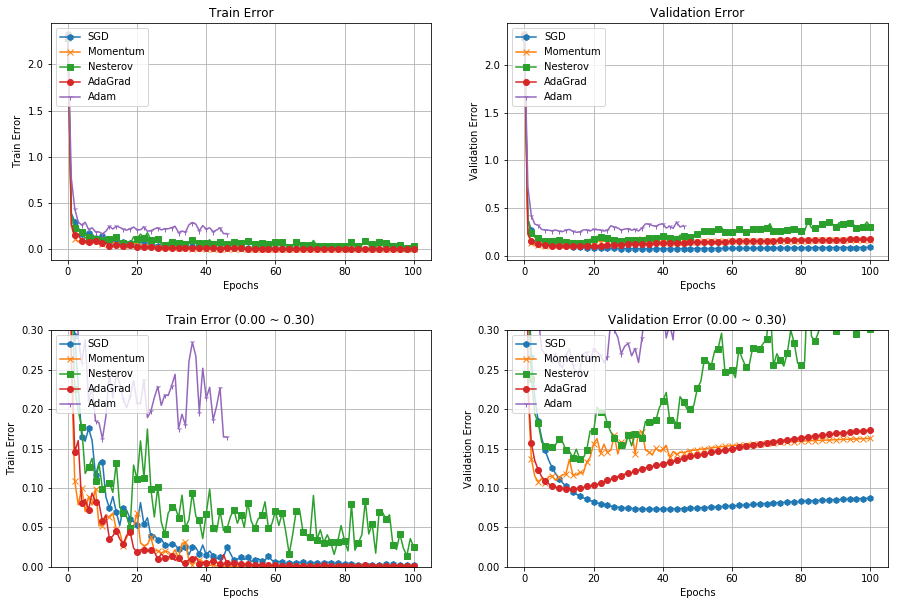

In [9]:
markers = {"SGD": "h", "Momentum": "x", "Nesterov": "s", "AdaGrad": "o", "Adam": "1"}
epoch_list = np.arange(max_epoch + 1)

f, axarr = plt.subplots(2, 2, figsize=(15,10))

for key, neural_network in neural_networks.items():
    axarr[0, 0].plot(epoch_list, neural_networks[key].train_error_list, marker=markers[key], markevery=2, label=key)
axarr[0, 0].set_ylabel('Train Error')
axarr[0, 0].set_xlabel('Epochs')
axarr[0, 0].grid(True)
axarr[0, 0].set_title('Train Error')
axarr[0, 0].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[0, 1].plot(epoch_list, neural_networks[key].validation_error_list, marker=markers[key], markevery=2, label=key)
axarr[0, 1].set_ylabel('Validation Error')
axarr[0, 1].set_xlabel('Epochs')
axarr[0, 1].grid(True)
axarr[0, 1].set_title('Validation Error')
axarr[0, 1].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[1, 0].plot(epoch_list, neural_networks[key].train_error_list, marker=markers[key], markevery=2, label=key)
axarr[1, 0].set_ylabel('Train Error')
axarr[1, 0].set_xlabel('Epochs')
axarr[1, 0].grid(True)
axarr[1, 0].set_ylim(0, 0.3)
axarr[1, 0].set_title('Train Error (0.00 ~ 0.30)')
axarr[1, 0].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[1, 1].plot(epoch_list, neural_networks[key].validation_error_list, marker=markers[key], markevery=2, label=key)
axarr[1, 1].set_ylabel('Validation Error')
axarr[1, 1].set_xlabel('Epochs')
axarr[1, 1].grid(True)
axarr[1, 1].set_ylim(0, 0.3)
axarr[1, 1].set_title('Validation Error (0.00 ~ 0.30)')
axarr[1, 1].legend(loc='upper left')

f.subplots_adjust(hspace=0.3)

plt.show()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


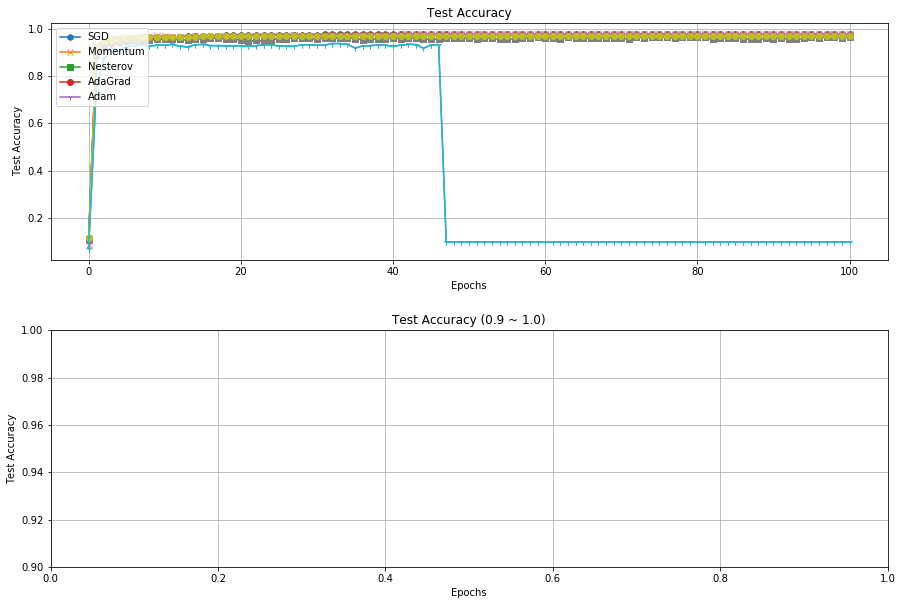

In [10]:
f, axarr = plt.subplots(2, 1, figsize=(15,10))

for key, neural_network in neural_networks.items():
    axarr[0].plot(epoch_list, neural_networks[key].test_accuracy_list, marker=markers[key], markevery=1, label=key)
axarr[0].set_ylabel('Test Accuracy')
axarr[0].set_xlabel('Epochs')
axarr[0].grid(True)
axarr[0].set_title('Test Accuracy')
axarr[0].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[0].plot(epoch_list, neural_networks[key].test_accuracy_list, marker=markers[key], markevery=1, label=key)
axarr[1].set_ylabel('Test Accuracy')
axarr[1].set_xlabel('Epochs')
axarr[1].grid(True)
axarr[1].set_ylim(0.9, 1.0)
axarr[1].set_title('Test Accuracy (0.9 ~ 1.0)')
axarr[1].legend(loc='upper left')

f.subplots_adjust(hspace=0.3)
plt.show()